In [214]:
from random import random
import numpy as np
from scipy import rand
import scipy.linalg
import matplotlib.pyplot as plt

np.set_printoptions(precision=1, suppress=True)

Opdracht 1. Het valt ons op dat er iets mis gaat in de code, de linker onder
singuliere waarde is af en toe negatief, terwijl dit positief zou moeten zijn.
Dit blijkt een gevolg te zijn van deze methode om de singulierewaardendecompositie te benaderen,
dit wordt in latere opdrachten verbeterd met een algemenere svd benadering gemaakt die ook voor een 2x2 matrix werkt.
We hebben de som van de absolute fouten van de singuliere waarden geplot as functie van $j$ voor $j \in \{0,1,\dots,5\}$.
Meestal is de fout na 2 of 3 iteraties al heel klein en daarna daalt het heel langzaam.

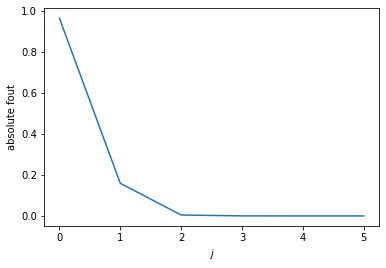

In [217]:
def rot2d(a, b):
    factor = 1/(np.sqrt(a**2+b**2))
    matrix = np.array([[a, b], [-b, a]])
    return factor*matrix

def approx_svd(A, j):
    if j == 0:
        return A
    prevA = approx_svd(A, j-1)
    if j % 2 == 0:
        return prevA @ rot2d(prevA[0][0], prevA[0][1]).T
    return rot2d(prevA[0][0], prevA[1][0]) @ prevA

def sigma(a):
    U, s, vH = np.linalg.svd(a)
    return s

def fout(A, j):
    onze_sv = [approx_svd(A, j)[0][0], approx_svd(A, j)[1][1]]
    np_sv = sigma(A)
    return sum(abs(onze_sv - np_sv))

A = np.random.rand(2, 2)

x_range = np.linspace(0,5,6)
y_range = np.array(list(map(lambda x: fout(A, x), x_range)))

plt.xlabel("$j$")
plt.ylabel("absolute fout")
plt.plot(x_range, y_range)

Opdracht 2.De nulrechts functie kan alle waardes in de bovendriehoek in nullen
verranderen en werkt dus alleen voor $i,j$ met $j>i$. De nullinks functie kan alle
waardes in de onderdriehoek in nullen verranderen en werkt dus alleen voor $i, j$
met $i>j$. Waarbij $i$ en $j$ natuurlijk wel naar een entry van de matrix wijzen.

In [133]:

def rot_links(n, a, b, i):
    boven = np.eye(i)
    onder = np.eye(n-i-2)
    return scipy.linalg.block_diag(boven, rot2d(a, b), onder)

def nul_links(A, i, j):
    a = A[i-2][j-1]
    b = A[i-1][j-1]
    return rot_links(len(A), a, b, (i-2))


def rot_rechts(n, a, b, i):
    boven = np.eye(i)
    onder = np.eye(n-i-2)
    return scipy.linalg.block_diag(boven, rot2d(a, b).T, onder)


def nul_rechts(A, i, j):
    c = A[i-1][j-2]
    d = A[i-1][j-1]
    return rot_rechts(len(A[0]), c, d, (j-2))

Opdracht 3. De stappen die worden toegepast zijn te vinden in opdracht 4.
De volgorde waarin deze stappen moeten worden uitgevoerd maakt uit. Een
verkeerde volgorde resulteert erin dat een eerder gemaakte nul wordt verpest bij
het maken van een nieuwe nul in de matrix.
De volgorde werkt als volgt bij een arbitrair grote matrix. Om een
boven-bidiagonaal matrix te maken begin je met de eerste kolom van onder naar
boven in nullen te veranderen. Vervolgens verander je de eerste rij in nullen,
beginnend bij het meest rechter element werkend tot 1 voor de diagonaal.
Vervolgens herhaal je dit op dezelfde volgorde voor de tweede kolom, en de
tweede rij, vervolgens voor de derde kolom en derde rij, en zo voort tot je
alle rijen langs bent gegaan. Dit is omdat de nulrijen/kolommen ervoor zorgen dat eerder gemaakte nullen nul zullen blijven.

Opdracht 4. Beide functies zijn in bidiagonaliseer(A) geimplementeerd.

In [137]:
def bidiagonaliseer(A):
    matrix = A.copy()
    l_rots = np.eye(len(A))

    for i in range(2, len(A)+1)[::-1]:
        l_rots = nul_links(matrix, i, 1) @ l_rots
        matrix = nul_links(matrix, i, 1) @ matrix
    r_rots = nul_rechts(matrix, 1, 3)
    matrix = matrix @ nul_rechts(matrix, 1, 3)
    for i in range(3, len(A)+1)[::-1]:
        l_rots = nul_links(matrix, i, 2) @ l_rots
        matrix = nul_links(matrix, i, 2) @ matrix

    l_rots = nul_links(matrix, 4, 3) @ l_rots
    matrix = nul_links(matrix, 4, 3) @ matrix
    return l_rots, matrix, r_rots

A = np.random.rand(4,3)

print("A=")
print(A)

print("\nResultaat van decompositie: ")
for m in bidiagonaliseer(A):
    print()
    print(m)

A=
[[0.1461 0.2691 0.5624]
 [0.8014 0.4045 0.7928]
 [0.2656 0.9009 0.0368]
 [0.5127 0.7354 0.0527]]

Resultaat van decompositie: 

[[ 0.1463  0.8026  0.266   0.5134]
 [ 0.6406 -0.3243  0.6951 -0.0358]
 [ 0.6158  0.3782 -0.4194 -0.5495]
 [ 0.4347 -0.328  -0.5198  0.6582]]

[[ 0.9985  1.2384 -0.    ]
 [-0.      0.5854 -0.2906]
 [-0.     -0.      0.7594]
 [-0.     -0.      0.    ]]

[[ 1.      0.      0.    ]
 [ 0.      0.7924 -0.61  ]
 [ 0.      0.61    0.7924]]


Opdracht 5. Door de twee waardes op de bovendiagonaal in nullen te verranderen,
oftwel voor een $4 \times 3$ de rechts rotatie voor $i=1$ en $j=2$ en vervolgens nog een
rechtsrotatie voor $i=2$ en $j=3$. Andersom om van een onder-bidiagonaal een
boven-bidiagonaal matrix te maken moet tweemaal een linksrotatie worden gedaan,
eenmaal voor $i=2$ en $j=1$ en daarna nog een linksrotatie voor $i=3$ en $j=2$.

Opdracht 6/7. Hier is de iteratie functie geimplementeerd voor arbitraire matrices, met een $4 \times 4$ matrix als voorbeeld.
Bij het vergelijken met numpy valt ons op dat onze U en V* ongelijk
zijn aan de U en V* van numpy. Onze U is de transpose van de numpy U en net zo
is onze V* de transpose van de numpy V*. Het blijkt dat uit deze methode dus
niet U en V* komen maar $U^*$ en $V$. (Omdat we alleen maar met reeele matrices werken is dit gelijk aan het transponeren).
Het is ons opgevallen dat bij vierkante matrices er soms een negatieve singuliere waarde helemaal rechts komt te staan, dit zorgt er ook voor
dat in $U$ een aantal kolommen van teken wisselen, wat ervoor zorgt dat dit niet triviaal is om te fixen. Hier moet dus rekening mee gehouden worden
wanneer deze benadering wordt gebruikt.

In [216]:
# Maak een bovenbidiagonaal matrix van een willekeurige matrix
def boven_bidiagonaliseer_alle(A):
    N = len(A)
    M = len(A[0])
    V = np.eye(len(A[0]), len(A[0]))
    U = np.eye(len(A), len(A))
    for i in range(1, max(N, M)):
        for j in range(N, i, -1):
            if i > M:
              continue
            links=nul_links(A, j, i)
            A = links@A
            U = links@ U
        for j in range(M, i+1, -1):
            if i > N:
                continue
            rechts = nul_rechts(A, i, j)
            A = A@ rechts
            V = V @ rechts
    return A, V, U

# Maak een onderbidiagonaal matrix van een bovenbidiagonaal matrix
def boven_naar_onder(A, V):
    n = len(A)
    m = len(A[0])
    i = 2
    j = 1
    while j <= n and i <= m:
        rechts =nul_rechts(A, j, i)
        A = A @ rechts
        V= V@ rechts
        i += 1
        j += 1
    return A, V

# Maak een bovenbidiagonaal matrix van een onderbidiagonaal matrix
def onder_naar_boven(A, U):
    n = len(A)
    m = len(A[0])
    i = 1
    j = 2
    while j <= n and i <= m:
        links=nul_links(A, j, i)
        A = links @ A
        U = links @ U
        i += 1
        j += 1
    return A, U

# bovenbidiagonaliseer A en voer n keer een boven_naar_onder en onder_naar_boven iteratie toe.
def iteratie(A, n):
    A, V, U = boven_bidiagonaliseer_alle(A)
    for _ in range(n):
        A, V = boven_naar_onder(A, V)
        A, U = onder_naar_boven(A, U)
    return A, V, U


N=4
M=4
Matrix = np.random.rand(N, M)
U_np,A_np, V_np = np.linalg.svd(Matrix)

A, V, U = iteratie(Matrix, 10)

print("Onze uitkomst:")
print("U=")
print(U)
print("A=")
print(A)
print("V*=")
print(V)
print("Start matrix:")
print(Matrix)
print("UAV*=")
print(U.T@A@V.T)

print("Numpy uitkomst:")
print("U=")
print(U_np)
print("A=")
print(A_np)
print("V*=")
print(V_np)
print("Start matrix:")
print(Matrix)
print("UAV*=")
print(U_np@A@V_np)


Onze uitkomst:
U=
[[ 0.6  0.5  0.4  0.4]
 [ 0.2 -0.1  0.6 -0.8]
 [ 0.2 -0.8  0.3  0.4]
 [-0.8  0.2  0.6  0.3]]
A=
[[ 2.5  0.  -0.  -0. ]
 [-0.   0.8  0.  -0. ]
 [-0.   0.   0.5 -0. ]
 [ 0.   0.   0.   0.2]]
V*=
[[ 0.3 -0.6  0.6  0.4]
 [ 0.6 -0.5 -0.6 -0.3]
 [ 0.5  0.3  0.5 -0.6]
 [ 0.6  0.5 -0.1  0.6]]
Start matrix:
[[0.3 0.7 0.9 0.9]
 [0.1 0.9 0.4 0.8]
 [0.1 0.2 0.7 0.9]
 [0.8 0.8 0.3 0.4]]
UAV*=
[[0.3 0.7 0.9 0.9]
 [0.1 0.9 0.4 0.8]
 [0.1 0.2 0.7 0.9]
 [0.8 0.8 0.3 0.4]]
Numpy uitkomst:
U=
[[-0.6 -0.2 -0.2 -0.8]
 [-0.5  0.1  0.8  0.2]
 [-0.4 -0.6 -0.3  0.6]
 [-0.4  0.8 -0.4  0.3]]
A=
[2.5 0.8 0.5 0.2]
V*=
[[-0.3 -0.6 -0.5 -0.6]
 [ 0.6  0.5 -0.3 -0.5]
 [-0.6  0.6 -0.5  0.1]
 [ 0.4 -0.3 -0.6  0.6]]
Start matrix:
[[0.3 0.7 0.9 0.9]
 [0.1 0.9 0.4 0.8]
 [0.1 0.2 0.7 0.9]
 [0.8 0.8 0.3 0.4]]
UAV*=
[[0.3 0.7 0.9 0.9]
 [0.1 0.9 0.4 0.8]
 [0.1 0.2 0.7 0.9]
 [0.8 0.8 0.3 0.4]]
